This tutorial refers to using the `fmi` library which can be found [here](https://github.com/asvcode/fmi) and the [fastai](https://github.com/fastai) medical imaging module

## Goal

- Create a dicom metadata dataframe from the images (using from_dicoms2)

- Within each folder(which represents each patient) we will choose 5 images that represent the best representation of the patient based on what window level and width

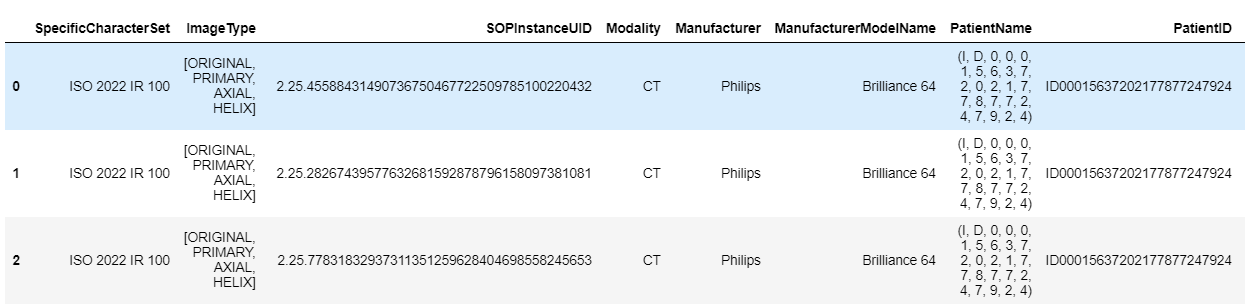

Load `gdcm` library - use `pe-models` database to access gdcm.tar file

## Dependancies

In [ ]:
!cp ../input/pe-models/gdcm.tar .
!tar -xvzf gdcm.tar
!conda install --offline ./gdcm/gdcm-2.8.9-py37h71b2a6d_0.tar.bz2
print("done")

import libraries

In [ ]:
from fastai.torch_core import set_seed
from fastai.vision.all import *
from fastai.medical.imaging import *
from torchvision.utils import save_image

import gdcm
matplotlib.rcParams['image.cmap'] = 'bone'

Currently the `fmi` package is still under construction and not pip installable. Instead install via the `fmipackage` dataset

In [ ]:
!cp -r ../input/fmipackage/fmi-master/* ./

In [ ]:
from fmi.explore import *
from fmi.preprocessing import *
from fmi.pipeline import *

In [ ]:
source = '../input/osic-pulmonary-fibrosis-progression'
train_source = '../input/osic-pulmonary-fibrosis-progression/train'
os_items = get_dicom_files(source, folders='train')
os_items

One of the issues with dicom datasets can be the sheer number of images, in this dataset there are over 33000 images.  Where does one start to get a quick and decent baseline?

One of the advantages of dicoms is that they contain a vast amount of metadata.  If you want to learn more about dicoms and medical imaging you can view my [blog](https://asvcode.github.io/MedicalImaging/) for more information

## Top 5 DataFrame and Dataset

`fastai` provides a very convenient way of getting all the dicom metadata and display it as a dataframe.  This works in parallel and is very quick.  The `fmi` library has a slightly updated version `from_dicoms2` which allows you to specify the value of `dicom_windows`.

Here we create a dataframe which will include all the information contained in the head of the dicom as well as the max, min, mean and standard deviation of each image.  The dataframe will also contain the percentage of pixels in the chosen window (width and level).  Here we use the `lungs` window

> Creating the dataframe could take a while depending on the size of the database.  For convenience the dicom_datframe is provided in the 'pct_5' dataset

In [ ]:
dicom_dataframe = pd.DataFrame.from_dicoms2(os_items, windows=dicom_windows.lungs)

In [ ]:
dicom_dataframe.head()

save the dataframe

In [ ]:
dicom_dataframe.to_csv('dicom_dataframe.csv', index=False)

There are currently `33026` images in this dataset.  It is important to drastically reduce this amout during the exploration stage. One way to do this is to only include images with the highest `img_pct_window` as specified by the window width and level.

Sort the values by `img_pct_window` and then group them by `PatientID`

In [ ]:
dicom_dataframe = pd.read_csv('../input/pct-5/dicom_dataframe.csv', low_memory=False)

In [ ]:
sort_w5 = dicom_dataframe.sort_values(['img_pct_window'],ascending=False).groupby('PatientID').head(5)
sort_w5

The new dataframe now only contains 880 entires sorted by the top 5 `img_pct_window` values for each patient.  The `img_pct_window` value depends on the window width and level chosen when using `from_dicoms2`

You can now save the new dataframe for later tasks

In [ ]:
sort_w5.to_csv('sort_w5.csv', index=False)

For more about the `fmi` library: [view on Github](https://github.com/asvcode/fmi)